In [1]:
import pandas as pd
import numpy as np

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

In [22]:
df = pd.read_csv("./Titanic Machine Learning from Disaster/train.csv")

In [23]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [25]:
df["Age"]

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [40]:
df = df.dropna(subset=["Age"])
df["Age"]

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
885    39.0
886    27.0
887    19.0
889    26.0
890    32.0
Name: Age, Length: 714, dtype: float64

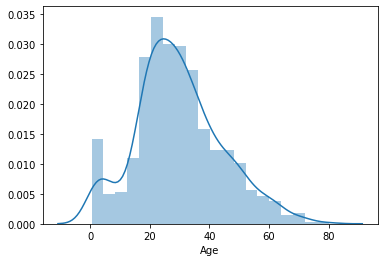

In [41]:
sns.distplot(df["Age"])

In [ ]:
# 固定幅で離散化する場合

# シンプルにやろうとすると
# 11-20
# 21-30
# …
# 
# もう少し凝って、ライフスタイルにあわせるとかだと、、
# 0-2
# 3-5
# 6-9
# 10-12 中学生
# 13-16 高校生
# 17-21 大学生
#
# 

In [42]:
# 固定幅ではない方法

# ↑も一理あるけど、
# 30代が大多数派とかだとあんまり意味ないかもなので、
# 分布に沿った分け方をしてみる

In [120]:
# お試し
# 1/4分位
# 2/4分位
# 3/4分位
# 3/4分位
quantile4 = df["Age"].quantile([0/4, 1/4, 2/4, 3/4, 4/4])
quantile4

0.00     0.420
0.25    20.125
0.50    28.000
0.75    38.000
1.00    80.000
Name: Age, dtype: float64

In [49]:
# describe結果とおなじ
df["Age"].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [118]:
quantile4.iloc[1]

28.0

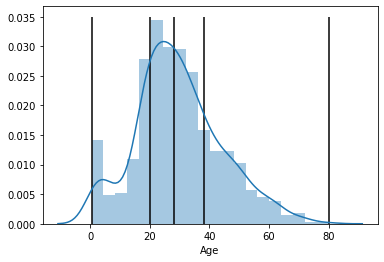

In [121]:
fig,ax = plt.subplots()
sns.distplot(df["Age"])
plt.vlines(ymin=0,ymax=0.035,x=quantile4.iloc[0])
plt.vlines(ymin=0,ymax=0.035,x=quantile4.iloc[1])
plt.vlines(ymin=0,ymax=0.035,x=quantile4.iloc[2])
plt.vlines(ymin=0,ymax=0.035,x=quantile4.iloc[3])
plt.vlines(ymin=0,ymax=0.035,x=quantile4.iloc[4])
plt.show()

In [ ]:
# たとえば5グループに分けたい場合は？

In [122]:
quantile5 = df["Age"].quantile([0/5, 1/5, 2/5, 3/5, 4/5, 5/5])
quantile5

0.0     0.42
0.2    19.00
0.4    25.00
0.6    31.80
0.8    41.00
1.0    80.00
Name: Age, dtype: float64

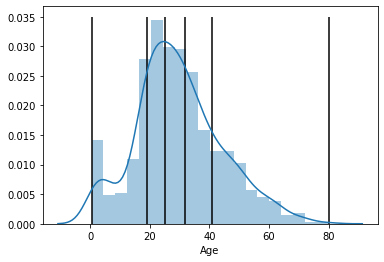

In [123]:
fig,ax = plt.subplots()
sns.distplot(df["Age"])
plt.vlines(ymin=0,ymax=0.035,x=quantile5.iloc[0])
plt.vlines(ymin=0,ymax=0.035,x=quantile5.iloc[1])
plt.vlines(ymin=0,ymax=0.035,x=quantile5.iloc[2])
plt.vlines(ymin=0,ymax=0.035,x=quantile5.iloc[3])
plt.vlines(ymin=0,ymax=0.035,x=quantile5.iloc[4])
plt.vlines(ymin=0,ymax=0.035,x=quantile5.iloc[5])
plt.show()

In [124]:
pd.qcut(df["Age"],5)
# -19未満 => ①
# 19以上 25未満 => ②
# 25以上 31未満 => ③
# 31以上 41未満 => ④
# 41以上 => ⑤

0       (19.0, 25.0]
1       (31.8, 41.0]
2       (25.0, 31.8]
3       (31.8, 41.0]
4       (31.8, 41.0]
           ...      
885     (31.8, 41.0]
886     (25.0, 31.8]
887    (0.419, 19.0]
889     (25.0, 31.8]
890     (31.8, 41.0]
Name: Age, Length: 714, dtype: category
Categories (5, interval[float64]): [(0.419, 19.0] < (19.0, 25.0] < (25.0, 31.8] < (31.8, 41.0] < (41.0, 80.0]]

In [126]:
# これはランクとしてはあってるんだろうけど、、実際の値としてはちょっと微妙では？
# だって③のひとは①の3倍かというとそうじゃないし
# いや、カテゴリとしてはいいのか？？Onehotなりする分にはいいかも
pd.qcut(df["Age"],5,labels=False)

0      1
1      3
2      2
3      3
4      3
      ..
885    3
886    2
887    0
889    2
890    3
Name: Age, Length: 714, dtype: int64

In [129]:
tmp = pd.DataFrame(pd.qcut(df["Age"],5))
tmp

,Age
0,"(19.0, 25.0]"
1,"(31.8, 41.0]"
2,"(25.0, 31.8]"
3,"(31.8, 41.0]"
4,"(31.8, 41.0]"
...,...
885,"(31.8, 41.0]"
886,"(25.0, 31.8]"
887,"(0.419, 19.0]"
889,"(25.0, 31.8]"


https://note.nkmk.me/python-pandas-str-replace-strip-etc/

In [163]:
#tmp["Age"].astype(str).apply(split(","))
tmp2 = tmp["Age"].astype(str).str.split(",", expand=True)
tmp2 = tmp2.rename(columns={0:"Age", 1:"quAge"})
tmp2

,Age,quAge
0,(19.0,25.0]
1,(31.8,41.0]
2,(25.0,31.8]
3,(31.8,41.0]
4,(31.8,41.0]
...,...,...
885,(31.8,41.0]
886,(25.0,31.8]
887,(0.419,19.0]
889,(25.0,31.8]


In [164]:
tmp2["quAge"] = tmp2["quAge"].str.replace("]","")
tmp2["Age"] = tmp2["Age"].str.replace("(","")
tmp2

,Age,quAge
0,19.0,25.0
1,31.8,41.0
2,25.0,31.8
3,31.8,41.0
4,31.8,41.0
...,...,...
885,31.8,41.0
886,25.0,31.8
887,0.419,19.0
889,25.0,31.8
